# Theme Model

In [1]:
import json
import numpy  as np
import pandas as pd
from glob import glob 
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# df = pd.read_pickle("data.pickle")

In [18]:
# df.head()

In [64]:
# y = pd.read_csv('nomura_redemp.csv')
# y.head()

,ym,redemption,delta,signal
0,2014-11-30,0.037555,NaN,False
1,2014-12-31,0.044058,0.006504,True
2,2015-01-31,0.038173,-0.005886,False
3,2015-02-28,0.038173,0.000000,False
4,2015-03-31,0.123520,0.085347,True


# 加入停用詞

In [65]:
# word_sentence_list = df['seg']

In [66]:
# stopWords=[]
# with open('stopword.txt', 'r', encoding='UTF-8') as file:
#     for data in file.readlines():
#         data = data.strip()
#         stopWords.append(data)
#         remainder_sentence = []

# stopWords.append('\n')
# apndix = ['(', '61', '.231', '.', '200', '.', '192', ' ', '臺灣', ')', ' ', '05', '/', '01', '/', '2020', ' ', '15', ':', '34', ':', '14\n',  '--\n', '※ '  ]
# for i in apndix:
#     stopWords.append(i)


In [74]:
# for i in word_sentence_list:
#     remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', i))
#     remainder_sentence.append(remainderWords)


In [75]:
# df['remainder_sentence'] = remainder_sentence

In [23]:
# df.head()

# 併入時間dataframe

In [76]:
# from pandas.tseries.offsets import MonthEnd
# df['time'] = pd.to_datetime(df['time'])
# df['EndOfMonth'] = pd.to_datetime(df['time'], format="%Y%m") + MonthEnd(1)
# df.head()

In [77]:
# df['EndOfMonth'] = df['EndOfMonth'].apply(lambda x:x.date())
# y['ym'] = pd.to_datetime(y['ym']).apply(lambda x:x.date())

In [78]:
# data = df.merge(y,   left_on='EndOfMonth',right_on='ym')
# data.head()

# 增加日期欄位

In [80]:
# data['date'] = df['time'].apply(lambda x:x.date())

# 儲存處理後最終檔案

In [81]:
# data.to_pickle('final_data.pickle')

# 讀取清洗完的資料

In [72]:
df = pd.read_pickle('final_data.pickle')

In [3]:
df.head()

,time,author,type,title,score,filename,content,seg,remainder_sentence,EndOfMonth,ym,redemption,delta,signal,date
0,2018-02-01 22:50:42,ted5566,新聞,台灣央行新掌門人如何走出自己的路？,10,pttdata\M.1517496645.A.38D.json,\n1.原文連結：\n\nhttps://cn.reuters.com/article/fo...,"[\n, 1, ., 原文, 連結, ：, \n, \n, \n, \n, \n, 2, ....","[原文, 連結, 原文, 內容, 台湾, 央行, 正式, 进入, 后彭时, 代, 新掌门, ...",2018-02-28,2018-02-28,0.120004,0.0,False,2018-02-01
1,2018-02-02 00:12:28,j853540,標的,大亞 空,3,pttdata\M.1517501551.A.D55.json,\n\n\n\n1. 標的：大亞\n\n2. 分類：空\n\n3. 分析/正文：\n\n最近...,"[\n, \n, \n, \n, 1, ., , 標的, ：, 大亞\n, \n, 2, ...","[標的, 大亞\n, 分類, 空\n, 分析, 正文, 最近, 發現, 隻, 一直, 跌, ...",2018-02-28,2018-02-28,0.120004,0.0,False,2018-02-02
2,2018-02-02 08:11:27,milk7054,新聞,蘋果本季營收預測不如預期 iPhone整體需,19,pttdata\M.1517530291.A.04E.json,\n-------------------------------發文提醒---------...,"[\n, -------------------------------, 發文, 提醒, ...","[-------------------------------, 發文, 提醒, ----...",2018-02-28,2018-02-28,0.120004,0.0,False,2018-02-02
3,2018-02-02 08:25:45,kaiming7955,新聞,蘋果營收、盈餘創新高，稱愛瘋X週週奪最,14,pttdata\M.1517531147.A.7F3.json,\n\n蘋果周四於美股盤後公佈前季（10-12月）財報，雖然愛瘋出貨量不如預期，但仍舊是營收...,"[\n, \n, 蘋果, 周四, 於, 美股, 盤, 後, 公佈, 前, 季, （, 10,...","[蘋果, 周四, 美股, 盤, 公佈, 前, 季, 10, -, 12月, 財報, 愛瘋, ...",2018-02-28,2018-02-28,0.120004,0.0,False,2018-02-02
4,2018-02-02 08:30:04,ESunBoy,閒聊,2018/02/02 盤中閒聊,569,pttdata\M.1517531406.A.3CD.json,\nxx老師早料到台股準備封關，\n2018全面毀滅，\n你一半我一半，\n大獲全勝。\n\...,"[\n, xx, 老師, 早, 料到, 台股, 準備, 封關, ，, \n, 2018, 全...","[xx, 老師, 早, 料到, 台股, 準備, 封關, 2018, 全面, 毀滅, 一半, ...",2018-02-28,2018-02-28,0.120004,0.0,False,2018-02-02


# 資料探索

In [84]:
type_index = [
    "新聞",
    "標的",
    "請益",
    "其他",
    "心得",
    "閒聊",
    "投顧"
]

In [85]:
df1 = df [df['type'].apply( lambda x:x in type_index)]

In [86]:
df1.groupby(['signal']).count()['content']

signal
False    14358
True     18115
Name: content, dtype: int64

In [87]:
df1.groupby(['type', 'signal']).count()

time  author  title  score  filename  content   seg  \
type signal                                                        
其他   False   1261    1261   1260   1261      1261     1261  1261   
     True    1621    1621   1620   1621      1621     1621  1621   
心得   False    526     526    525    526       526      526   526   
     True    1472    1472   1470   1472      1472     1472  1472   
投顧   False     36      36     36     36        36       36    36   
     True      50      50     50     50        50       50    50   
新聞   False   8161    8161   8123   8161      8161     8161  8161   
     True    9722    9722   9675   9722      9722     9722  9722   
標的   False   2323    2323   2305   2323      2323     2323  2323   
     True    2421    2421   2410   2421      2421     2421  2421   
請益   False   1661    1661   1656   1661      1661     1661  1661   
     True    2448    2448   2446   2448      2448     2448  2448   
閒聊   False    390     390    390    390       390      390   390   
     True     381     381    381    381       381      381   381   

             remainder_sentence  EndOfMonth    ym  redemption  delta  date  
type signal                                                                 
其他   False                 1261        1261  1261        1261   1261  1261  
     True                  1621        1621  1621        1621   1621  1621  
心得   False                  526         526   526         526    526   526  
     True                  1472        1472  1472        1472   1472  1472  
投顧   False                   36          36    36          36     36    36  
     True                    50          50    50          50     50    50  
新聞   False                 8161        8161  8161        8161   8161  8161  
     True                  9722        9722  9722        9722   9722  9722  
標的   False                 2323        2323  2323        2323   2323  2323  
     True                  2421        2421  2421        2421   2421  2421  
請益   False                 1661        1661  1661        1661   1661  1661  
     True                  2448        2448  2448        2448   2448  2448  
閒聊   False                  390         390   390         390    390   390  
     True                   381         381   381         381    381   381

# 根據心得和請益畫圖

In [105]:
# sns.set_style("darkgrid")
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})


In [133]:
plot_data1 = df1[ (df1['type']=="請益") & (df1['signal']==False) ]
plot_data2 = df1[ (df1['type']=="請益") & (df1['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

In [139]:
# plot_data1 = df1[  (df1['signal']==False) ]
# plot_data2 = df1[ (df1['signal']==True) ]

# plot_data1=pd.concat([plot_data1, plot_data2])

In [137]:
plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

Text(0.5, 1.0, '文章每日發文量 vs 贖回率上升')

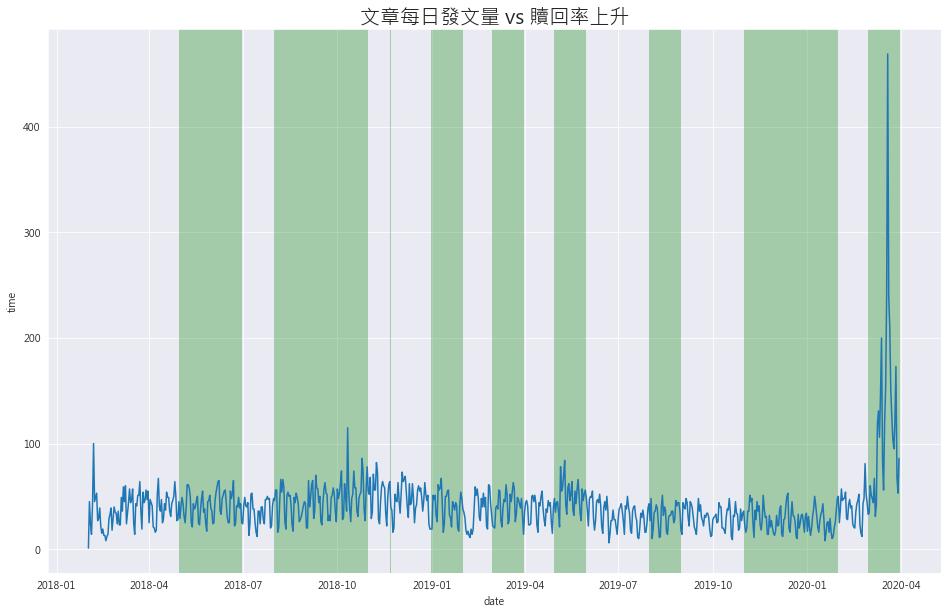

In [138]:
fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("文章每日發文量 vs 贖回率上升", fontsize=20)

# 找關鍵字

In [19]:
a=df.groupby("type").count()['time'].sort_values(ascending=False)[:7]

In [24]:
# sns.set_style("darkgrid")
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})


[Text(0, 0, '新聞'),
 Text(0, 0, '標的'),
 Text(0, 0, '請益'),
 Text(0, 0, '其他'),
 Text(0, 0, '心得'),
 Text(0, 0, '閒聊'),
 Text(0, 0, '投顧')]

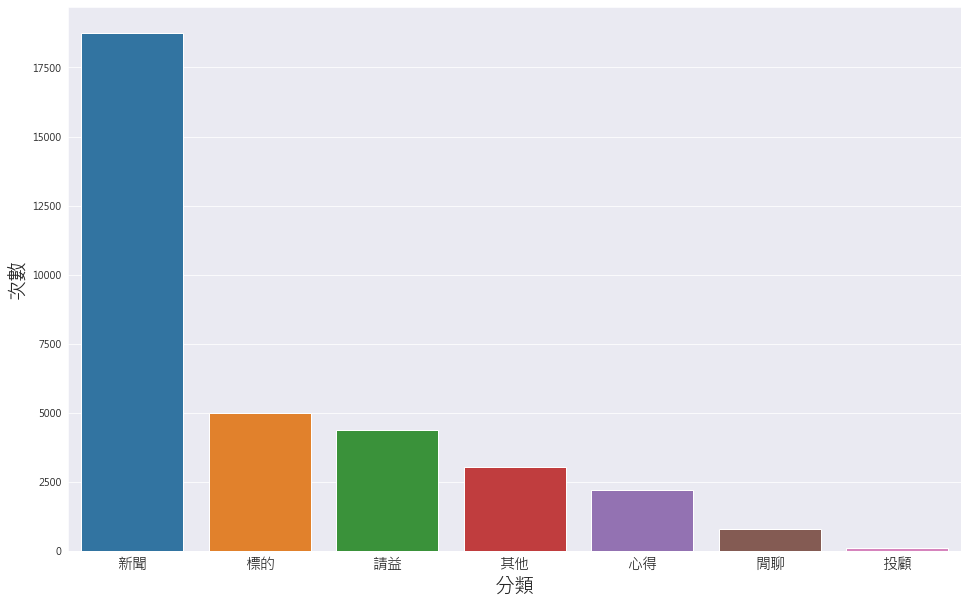

In [41]:
fig, ax = plt.subplots(figsize=(16,10))

sns.barplot(x=a.index, y=a)
ax.set_xlabel("分類",fontsize=20)
ax.set_ylabel("次數",fontsize=20)
ax.set_xticklabels(a.index, size = 15)

In [30]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

# 抓KOL

In [45]:
df.groupby('author').count()['time'].sort_values()

author
spcjp            1
gameking249      1
gan              1
ganninian        1
seiryou          1
              ... 
coconing       506
Su22           535
ESunBoy        573
CLV518         805
nightwing      849
Name: time, Length: 5788, dtype: int64

In [56]:
text_rank = df.groupby('author').count()['time'].sort_values(ascending=False).head(10)
text_rank

author
nightwing     849
CLV518        805
ESunBoy       573
Su22          535
coconing      506
cjol          495
zxcvxx        462
mayingnine    386
l75cm         354
anti87        330
Name: time, dtype: int64

In [85]:
df[df['author']=='coconing']

,time,author,type,title,score,filename,content
179,2018-02-06 15:02:44,coconing,其他,107年02月06日 三大法人買賣金額統計表,111,pttdata\M.1517900566.A.0B4.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
348,2018-02-09 15:01:28,coconing,其他,107年02月09日 三大法人買賣金額統計表,88,pttdata\M.1518159691.A.0BD.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
454,2018-02-12 14:59:35,coconing,其他,107年02月12日 三大法人買賣金額統計表,126,pttdata\M.1518418779.A.A3D.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
600,2018-02-21 15:01:56,coconing,其他,107年02月21日 三大法人買賣金額統計表,51,pttdata\M.1519196519.A.01F.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
630,2018-02-22 15:01:09,coconing,其他,107年02月22日 三大法人買賣金額統計表,29,pttdata\M.1519282873.A.BEE.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
...,...,...,...,...,...,...,...
33826,2020-04-22 15:05:34,coconing,其他,109年04月22日 三大法人買賣金額統計表,152,pttdata\M.1587539137.A.216.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
34060,2020-04-27 15:02:59,coconing,其他,109年04月27日 三大法人買賣金額統計表,176,pttdata\M.1587970981.A.4FE.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
34099,2020-04-28 15:06:38,coconing,其他,109年04月28日 三大法人買賣金額統計表,93,pttdata\M.1588057621.A.37D.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
34177,2020-04-29 14:59:03,coconing,其他,109年04月29日 三大法人買賣金額統計表,115,pttdata\M.1588143546.A.3A4.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...


In [55]:
df[df['score']>30].groupby('author').count()['time'].sort_values(ascending=False).head(10)

author
coconing       460
vendan5566     264
nightwing      217
hito21         165
justforsing    149
CLV518         121
tim0259        120
EDFR           113
ESunBoy        111
zesonpso       100
Name: time, dtype: int64

In [87]:
df[df['author']=='vendan5566']

,time,author,type,title,score,filename,content
436,2018-02-12 08:30:37,vendan5566,閒聊,2018/02/12 盤中閒聊,625,pttdata\M.1518395440.A.F2A.json,\n紅包 or me\n\n ◢███◣ ◢▄▄▄▄▄◣\n ＞ ＜ ▄▄▄▄▄▄...
493,2018-02-14 08:30:26,vendan5566,閒聊,2018/02/14 盤中閒聊,207,pttdata\M.1518568229.A.F53.json,\n新年快樂！\n祝大家都有很多錢可以包！\n情人節快樂！\n祝大家都有小辣椒可以抱！\n\...
589,2018-02-21 08:30:03,vendan5566,閒聊,2018/02/21 盤中閒聊,587,pttdata\M.1519173005.A.F0D.json,\n歡天喜地狗年第一盤\n\n人人賺錢賺到翻\n\n--\n
627,2018-02-22 14:00:53,vendan5566,閒聊,2018/02/22 盤後閒聊,215,pttdata\M.1519279255.A.8A7.json,\n又下雨\n\n睡公園的各位注意保暖了\n\n--\n
653,2018-02-23 08:30:03,vendan5566,閒聊,2018/02/23 盤中閒聊,577,pttdata\M.1519345805.A.31B.json,\n你說你有點難追 想讓我知難而退\n身家馬上就變現 只等綠葉變紅葉\n喊著數錢的機會 不害...
...,...,...,...,...,...,...,...
32284,2020-03-27 13:39:43,vendan5566,心得,早知道今天是這樣，我就,39,pttdata\M.1585287585.A.074.json,\n看大家多少都還是出現了早知道的心態\n\n早知道我就開盤尾盤補\n\n早知道我反彈就出光...
32877,2020-04-06 09:51:17,vendan5566,新聞,科技大廠第一家！鴻海宣布警報景點員工在,34,pttdata\M.1586137879.A.66B.json,\n\n1.原文連結：\nhttps://tw.appledaily.com/propert...
32984,2020-04-07 20:56:36,vendan5566,參選,vendan5566,138,pttdata\M.1586264198.A.862.json,\n參選人：vendan5566\n\n1.上站次數：1118次\n\n2.發表文章篇數:《...
33149,2020-04-10 10:38:43,vendan5566,新聞,中環3/24～4/9處分台灣高鐵股票虧損829,31,pttdata\M.1586486325.A.5FE.json,\n1.原文連結：\nhttps://reurl.cc/R4Xmax\n\n2.原文內容：\...


In [72]:
text_rank = df[df['type'] != '新聞'][df['type'] !='其他'].groupby('author').count()['time'].sort_values(ascending=False).head(10)
text_rank

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


author
vendan5566     264
hito21         175
justforsing    137
hrma           128
tim0259        114
epson5566      102
j2708180       100
zesonpso        90
Ejaculation     76
zakijudelo      61
Name: time, dtype: int64

In [93]:
df[df['author']=='hito21']

,time,author,type,title,score,filename,content
8104,2018-08-27 11:15:17,hito21,標的,元大滬深300正2,44,pttdata\M.1535339720.A.B5C.json,\n--------------------------------------------...
9278,2018-09-21 23:25:44,hito21,標的,長榮航,24,pttdata\M.1537543547.A.439.json,\n--------------------------------------------...
10252,2018-10-11 23:26:30,hito21,標的,元大黃金S&P正2,3,pttdata\M.1539271593.A.E72.json,\n1. 標的：元大S&P黃金 正2\n\n2. 分類：多/空/請益/心得\n\n短多 不宜...
10515,2018-10-17 16:37:56,hito21,標的,00672L 元大S&P原油正2,8,pttdata\M.1539765479.A.FE0.json,\n先損出 趨勢轉太大...還有低點可接~感恩...\n不空等低點接回 台股大戶有套到所以%...
10997,2018-10-26 13:23:53,hito21,標的,00669R+00671R 美國反1,4,pttdata\M.1540531436.A.6A2.json,\n獲利達標出場~感謝...\n\n1. 標的：00671R+00669R\n\n2. 分類...
...,...,...,...,...,...,...,...
27593,2020-01-23 22:49:03,hito21,標的,道瓊03(UDH0) 月刊~,69,pttdata\M.1579790945.A.3A8.json,\n1. 標的：道瓊03(UDH0) or 美國道瓊指數~\n\n2. 分類：多/空/請益/...
28790,2020-02-26 19:04:01,hito21,標的,道瓊03(UDH0) 月報~,106,pttdata\M.1582715043.A.F0E.json,\n1. 標的：道瓊03(UDH0) 月報 or 美國道瓊指數~\n\n2. 分類：多/空/...
31885,2020-03-23 22:59:55,hito21,標的,微型小道瓊06,51,pttdata\M.1584975599.A.E0D.json,\n1. 標的：微型小道瓊06\n\n2. 分類：多/空/請益/心得\n請益 用來分享美國D...
32527,2020-03-30 10:25:00,hito21,標的,00637L 元大滬深300正2,13,pttdata\M.1585535102.A.5A7.json,\n1. 標的：00637L 元大滬深300正2\n\n2. 分類：多/空/請益/心得\n短...


In [94]:
df[df['author']=='hito21'].groupby('type').count()

,time,author,title,score,filename,content
type,,,,,,
標的,174,174,174,174,174,174
標的 美國道瓊(*UDU9),1,1,0,1,1,1


# 日期熱度

In [102]:
df['time'] = pd.to_datetime(df['time'] )

In [105]:
df['time'][0].date()

datetime.date(2018, 2, 1)

In [106]:
df['date'] = df['time'].apply(lambda x:x.date())

In [110]:
time = df.groupby('date').count()
time

,time,author,type,title,score,filename,content
date,,,,,,,
2018-02-01,1,1,1,1,1,1,1
2018-02-02,45,45,45,45,45,45,45
2018-02-03,25,25,25,25,25,25,25
2018-02-04,14,14,14,14,14,14,14
2018-02-05,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...
2020-04-27,42,42,42,42,42,42,42
2020-04-28,59,59,59,59,59,59,59
2020-04-29,92,92,92,92,92,92,92


Text(0.5, 1.0, '每日文章筆數')

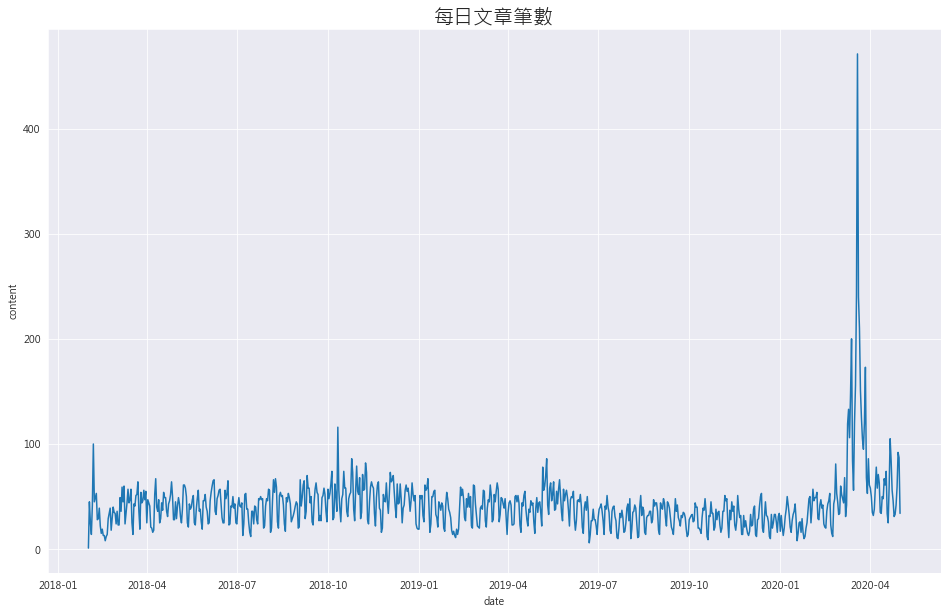

In [117]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x=time.index, y=time['content'])
ax.set_title("每日文章筆數", fontsize=20)

In [120]:
se = time['time']

In [121]:
se.describe()

count    821.000000
mean      41.844093
std       27.711054
min        1.000000
25%       27.000000
50%       39.000000
75%       50.000000
max      471.000000
Name: time, dtype: float64

# 統計詞數

In [7]:
data = df[df['author']=='hito21']

In [8]:
sub_data = data[['remainder_sentence','signal']]

In [117]:
sub_data

,remainder_sentence,signal
8104,[---------------------------------------------...,True
9278,[---------------------------------------------...,True
10252,"[標的, 元大, S&P, 黃金, 正, 2\n, 分類, 空, 請益, 心得, 短多, 不...",True
10515,"[先, 損出, 趨勢, 轉, 太, 低點, 接, ~, 感恩, ..., 空, 低點, 接回...",True
10997,"[獲利, 達標, 出場, ~, 感謝, ..., 標的, 00671, R+, 00669,...",True
...,...,...
26968,"[標的, 道瓊, 03, UDH0, 分類, 空, 請益, 心得, 請益, 分享, 夜盤, ...",True
27593,"[標的, 道瓊, 03, UDH0, or , 美國, 道瓊, 指數, ~, 分類, 空,...",True
28790,"[標的, 道瓊, 03, UDH0, 月報, or , 美國, 道瓊, 指數, ~, 分...",False
31885,"[標的, 微型, 道瓊, 06, 分類, 空, 請益, 心得, 請益, 分享, 美國, DJ...",True


In [4]:
def find_key_word_table(sub_data, top_range=80, top_select=20):
    pos_dict = dict()
    neg_dict = dict()
    
    for seg, signal in zip(sub_data['remainder_sentence'], sub_data['signal']):
        if signal==True:
            for word in seg:
                if word in pos_dict:
                    pos_dict[word] += 1
                else:
                    pos_dict[word] = 1 
        if signal==False:
            for word in seg:
                if word in neg_dict:
                    neg_dict[word] += 1
                else:
                    neg_dict[word] = 1 
    
    pos_words  = pd.Series(pos_dict,index=pos_dict.keys())
    neg_words  = pd.Series(neg_dict,index=neg_dict.keys())
    
    test_pos=[]
    for i in pos_words.sort_values(ascending=False).index[:top_range]:
        test_pos.append(i)
        
    test_neg=[]
    for i in neg_words.sort_values(ascending=False).index[:top_range]:
        test_neg.append(i)
        
    pos_words = [i  for i in test_pos[:top_select] if i not in test_neg]
    neg_words = [i  for i in test_neg[:top_select] if i not in test_pos]
    selected_words = pos_words+neg_words
    selected_words = list(filter(lambda word: '\n' not  in word, selected_words))
    selected_words = list(filter(lambda word: '0' not  in word, selected_words))
    
    reg_data = pd.DataFrame()

    for i in selected_words:
        df = sub_data['remainder_sentence'].apply(lambda x: i in x)
        df = df.rename(i)
        reg_data = pd.concat([reg_data, df], axis=1)
        
    reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)
    reg_data['signal'] = reg_data['signal'].astype(int)
    
    return reg_data

In [46]:
# data = df[df['author']=='hito21']
# find_key_word_table(data)

,,中國,美,關稅,貿易,囉,川普,市場,日本,協議,...,沒,數據,news,說,盤整,進場,空手,破,建議,signal
8104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
9278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
10252,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,1
10515,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
10997,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,1
27593,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,1
28790,False,True,False,False,False,True,True,True,True,False,...,True,False,False,True,False,True,False,False,True,0
31885,True,True,True,False,False,False,False,False,True,False,...,True,True,False,True,False,True,False,False,False,1


In [9]:
pos_dict = dict()
neg_dict = dict()

In [10]:
sub_data

,remainder_sentence,signal
8104,[---------------------------------------------...,True
9278,[---------------------------------------------...,True
10252,"[標的, 元大, S&P, 黃金, 正, 2\n, 分類, 空, 請益, 心得, 短多, 不...",True
10515,"[先, 損出, 趨勢, 轉, 太, 低點, 接, ~, 感恩, ..., 空, 低點, 接回...",True
10997,"[獲利, 達標, 出場, ~, 感謝, ..., 標的, 00671, R+, 00669,...",True
...,...,...
26968,"[標的, 道瓊, 03, UDH0, 分類, 空, 請益, 心得, 請益, 分享, 夜盤, ...",True
27593,"[標的, 道瓊, 03, UDH0, or , 美國, 道瓊, 指數, ~, 分類, 空,...",True
28790,"[標的, 道瓊, 03, UDH0, 月報, or , 美國, 道瓊, 指數, ~, 分...",False
31885,"[標的, 微型, 道瓊, 06, 分類, 空, 請益, 心得, 請益, 分享, 美國, DJ...",True


In [75]:
lt = ['Justin', 'cate\nrpillar', 'openhome']
print(list(filter(lambda ele: len(ele) > 6, lt)))
print(list(filter(lambda ele: '\n' not  in ele, lt)))

['cate\nrpillar', 'openhome']
['Justin', 'openhome']


In [11]:
for seg, signal in zip(sub_data['remainder_sentence'], sub_data['signal']):
    if signal==True:
        for word in seg:
            if word in pos_dict:
                pos_dict[word] += 1
            else:
                pos_dict[word] = 1 
    if signal==False:
        for word in seg:
            if word in neg_dict:
                neg_dict[word] += 1
            else:
                neg_dict[word] = 1 

In [12]:
pos_words  = pd.Series(pos_dict,index=pos_dict.keys())
neg_words  = pd.Series(neg_dict,index=neg_dict.keys())

In [13]:
pos_words.sort_values(ascending=False)

~                  638
...                273
美國                 253
~                  236
機制                 182
                  ... 
準則                   1
13日                  1
赤裸裸                  1
 -25813-25775-"      1
22.5                 1
Length: 3817, dtype: int64

In [14]:
neg_words.sort_values(ascending=False)

~         492
!         349
...       292
-         249
~         223
         ... 
轟           1
引領          1
反應完         1
變臉          1
 3000億      1
Length: 3227, dtype: int64

In [15]:
test_pos=[]
for i in pos_words.sort_values(ascending=False).index[:50]:
    test_pos.append(i)

In [16]:
test_neg=[]

for i in neg_words.sort_values(ascending=False).index[:50]:
    test_neg.append(i)

In [17]:
pos_words = [i  for i in test_pos if i not in test_neg]
pos_words

['  ', '中國', '美', '關稅', '貿易', '囉', '川普', '市場', '日本', '協議', '經濟', '消息']

In [18]:
neg_words = [i  for i in test_neg if i not in test_pos]
neg_words

['區間', '高', '操作', '沒', '數據', 'news', '說', '盤整', '進場', '空手', '破', '建議']

In [19]:
selected_words = pos_words+neg_words
selected_words

['  ',
 '中國',
 '美',
 '關稅',
 '貿易',
 '囉',
 '川普',
 '市場',
 '日本',
 '協議',
 '經濟',
 '消息',
 '區間',
 '高',
 '操作',
 '沒',
 '數據',
 'news',
 '說',
 '盤整',
 '進場',
 '空手',
 '破',
 '建議']

In [20]:
sub_data['remainder_sentence']

8104     [---------------------------------------------...
9278     [---------------------------------------------...
10252    [標的, 元大, S&P, 黃金, 正, 2\n, 分類, 空, 請益, 心得, 短多, 不...
10515    [先, 損出, 趨勢, 轉, 太, 低點, 接, ~, 感恩, ..., 空, 低點, 接回...
10997    [獲利, 達標, 出場, ~, 感謝, ..., 標的, 00671, R+, 00669,...
                               ...                        
26968    [標的, 道瓊, 03, UDH0, 分類, 空, 請益, 心得, 請益, 分享, 夜盤, ...
27593    [標的, 道瓊, 03, UDH0,  or , 美國, 道瓊, 指數, ~, 分類, 空,...
28790    [標的, 道瓊, 03, UDH0,  月報,  or , 美國, 道瓊, 指數, ~, 分...
31885    [標的, 微型, 道瓊, 06, 分類, 空, 請益, 心得, 請益, 分享, 美國, DJ...
32527    [標的, 00637, L , 元大滬, 深, 300, 正, 2\n, 分類, 空, 請益...
Name: remainder_sentence, Length: 174, dtype: object

In [21]:
reg_data = pd.DataFrame()

for i in selected_words:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

In [22]:
reg_data

,,中國,美,關稅,貿易,囉,川普,市場,日本,協議,...,操作,沒,數據,news,說,盤整,進場,空手,破,建議
8104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10252,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
10515,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10997,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
27593,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
28790,False,True,False,False,False,True,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
31885,True,True,True,False,False,False,False,False,True,False,...,False,True,True,False,True,False,True,False,False,False


In [23]:
reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)

In [24]:
reg_data.head()

,,中國,美,關稅,貿易,囉,川普,市場,日本,協議,...,沒,數據,news,說,盤整,進場,空手,破,建議,signal
8104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
9278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
10252,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
10515,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
10997,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,True


In [31]:
reg_data['signal'] = reg_data['signal'].astype(int)

In [32]:
reg_data

,,中國,美,關稅,貿易,囉,川普,市場,日本,協議,...,沒,數據,news,說,盤整,進場,空手,破,建議,signal
8104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
9278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
10252,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,1
10515,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
10997,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,1
27593,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,1
28790,False,True,False,False,False,True,True,True,True,False,...,True,False,False,True,False,True,False,False,True,0
31885,True,True,True,False,False,False,False,False,True,False,...,True,True,False,True,False,True,False,False,False,1


# 跑分類模型

In [5]:
data = df[df['author']=='epson5566']
reg_data = find_key_word_table(data, 50,50)

In [6]:
reg_data.columns

Index(['報酬', '圖', '中', '觀察', '金融', '資料', '認為', '目前', '未來', '成本', '狀況', '~',
       '連結', '已經', '長期', '簡單', '股市', '想', '外資', '股票', '美元', '其實', '-', '經濟',
       '月', '252', '239', '兩', '通膨', '就業', '43', '文章', '負債', '影響', '沒', '使用',
       '31', '預期', '非', 'signal'],
      dtype='object')

In [13]:
reg_data = reg_data[reg_data.iloc[:,:-1].sum(axis=1)!=0]

In [78]:
reg_data.columns

Index(['報酬', '圖', '03', '中', '觀察', '金融', '資料', '認為', '目前', '未來', '成本', '狀況',
       '~', '連結', '已經', '長期', '簡單', '股市', '想', '外資', '股票', '美元', '06', '其實',
       '08', '-', '04', '經濟', '月', '252', '239', '兩', '通膨', '就業', '43', '文章',
       '240', '負債', '影響', '沒', '使用', '31', '預期', '非', 'signal'],
      dtype='object')

In [25]:
import pycaret

In [14]:
from pycaret.classification import *

In [15]:
exp_clf = setup(reg_data, target = 'signal')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6345
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(96, 40)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,39
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [16]:

compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:01:13
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.7167,0.0000,0.825,0.7517,0.7764,0.3764
1,Gradient Boosting Classifier,0.7167,0.7625,0.800,0.7767,0.7713,0.3901
2,Extra Trees Classifier,0.6881,0.7000,0.750,0.7250,0.7306,0.3629
3,Ada Boost Classifier,0.6857,0.7333,0.725,0.7817,0.7296,0.3386
4,Decision Tree Classifier,0.6810,0.6917,0.725,0.7600,0.7246,0.3543
5,Naive Bayes,0.6738,0.6021,0.925,0.6848,0.7750,0.2391
6,Random Forest Classifier,0.6738,0.6875,0.700,0.7717,0.6998,0.3419
7,Linear Discriminant Analysis,0.6667,0.6125,0.700,0.7300,0.7016,0.3139
8,Logistic Regression,0.6595,0.6875,0.850,0.7005,0.7530,0.2301
9,SVM - Linear Kernel,0.6429,0.0000,0.750,0.6938,0.7051,0.2058


LightGBMError: Do not support non-ASCII characters in feature name.

In [114]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5714,0.7083,0.7500,0.6000,0.6667,0.0870
1,0.8571,0.8333,1.0000,0.8000,0.8889,0.6957
2,0.7143,0.7917,0.7500,0.7500,0.7500,0.4167
3,0.5714,0.7917,0.7500,0.6000,0.6667,0.0870
4,0.4286,0.5833,0.5000,0.5000,0.5000,-0.1667
5,0.8571,0.9167,1.0000,0.8000,0.8889,0.6957
6,0.4286,0.4167,0.7500,0.5000,0.6000,-0.2727
7,0.6667,0.4375,1.0000,0.6667,0.8000,0.0000
8,0.6667,0.2500,1.0000,0.6667,0.8000,0.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [128]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5714,0.8333,0.7500,0.6000,0.6667,0.0870
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.8333,1.0000,0.6667,0.8000,0.3636
3,0.7143,0.5833,0.7500,0.7500,0.7500,0.4167
4,0.7143,0.8333,0.7500,0.7500,0.7500,0.4167
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7143,0.8333,0.7500,0.7500,0.7500,0.4167
7,0.8333,1.0000,0.7500,1.0000,0.8571,0.6667
8,0.8333,0.8750,0.7500,1.0000,0.8571,0.6667
9,0.8333,1.0000,0.7500,1.0000,0.8571,0.6667


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

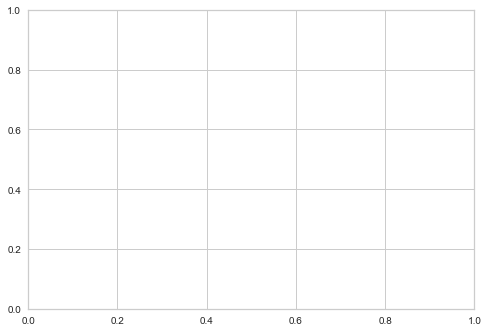

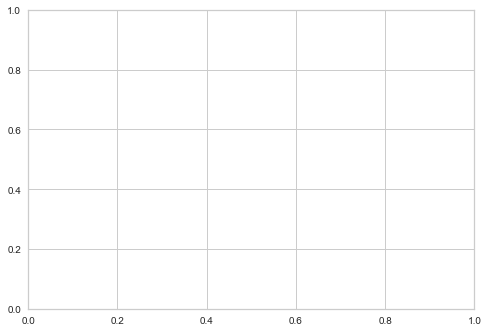

In [129]:
evaluate_model(ada)

In [41]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5385,0.7143,0.4286,0.6000,0.5000,0.0930
1,0.9167,1.0000,0.8333,1.0000,0.9091,0.8333
2,0.6667,0.9444,1.0000,0.6000,0.7500,0.3333
3,0.9167,0.9722,1.0000,0.8571,0.9231,0.8333
4,0.7500,0.8889,0.8333,0.7143,0.7692,0.5000
5,0.7500,0.8611,0.6667,0.8000,0.7273,0.5000
6,0.5833,0.8056,0.3333,0.6667,0.4444,0.1667
7,0.6667,0.7222,0.5000,0.7500,0.6000,0.3333
8,0.6667,0.6389,0.6667,0.6667,0.6667,0.3333
9,0.3333,0.2857,0.4286,0.4286,0.4286,-0.3714


In [38]:
# create_model?

In [131]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5714,0.5833,0.7500,0.6000,0.6667,0.0870
1,0.7143,0.6667,1.0000,0.6667,0.8000,0.3636
2,0.5714,0.3333,0.7500,0.6000,0.6667,0.0870
3,0.7143,0.4167,1.0000,0.6667,0.8000,0.3636
4,0.5714,0.5833,0.7500,0.6000,0.6667,0.0870
5,0.2857,0.2500,0.5000,0.4000,0.4444,-0.5217
6,0.5714,0.6667,0.5000,0.6667,0.5714,0.1600
7,0.5000,0.3750,0.7500,0.6000,0.6667,-0.2857
8,0.8333,0.6250,1.0000,0.8000,0.8889,0.5714
9,0.3333,0.6250,0.2500,0.5000,0.3333,-0.2000


In [132]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# TFIDF

In [18]:
# data1 = data.copy()

In [75]:
data = df[df['type']=="心得"]

In [77]:
data1 = data[data['signal']==1]
data0 = data[data['signal']==0]

In [89]:
corpus = []
for i in data0['remainder_sentence']:
    corpus.append(" ".join(i))

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# corpus = ["welcome to stackoverflow my friend",  "my friend, don't worry, you can get help from stackoverflow"]
# corpus = np.array(data['remainder_sentence'].apply(lambda x:np.array(x)))
corpus
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(corpus)
# print(matrix)

In [91]:
print (matrix.shape)

(526, 17140)


In [93]:
words = vectorizer.get_feature_names()
# for i in range(len(corpus)):
#     print ('----Document {}----'.format(i))
#     for j in range(len(words)):
#         if matrix[i,j] > 1e-5:
#               print (words[j].encode('utf-8'), matrix[i,j])
#                  print (words[j], matrix[i,j])

In [94]:
matrix.toarray().shape

(526, 17140)

In [84]:
a = pd.DataFrame(matrix.toarray()).sum()

In [85]:
a

0        5.563549
1        1.346487
2        0.038085
3        0.325734
4        0.157863
           ...   
29041    0.137435
29042    0.116223
29043    0.188256
29044    0.171242
29045    0.063233
Length: 29046, dtype: float64

In [95]:
a = pd.DataFrame(matrix.toarray()).sum()
b = a.sort_values(ascending=False)[:50]

In [96]:
word_list=[]

for i in b.index:
    word_list.append(words[i])

word_list

['股票',
 '編輯',
 '2019',
 '2018',
 '投資',
 '公司',
 '04',
 '沒有',
 '美國',
 '台股',
 '股市',
 '大盤',
 '市場',
 '10',
 '現在',
 '02',
 '指數',
 '外資',
 '交易',
 '目前',
 '真的',
 '操作',
 '12',
 '應該',
 '知道',
 '今天',
 '已經',
 '股價',
 '獲利',
 '可能',
 '11',
 '覺得',
 '台灣',
 '分析',
 '發文',
 '不會',
 '時間',
 '中國',
 '07',
 '20',
 '散戶',
 '比較',
 '其實',
 '很多',
 '06',
 '進場',
 '經濟',
 '一下',
 '最近',
 '不要']

In [88]:
word_list_pos = word_list

In [97]:
word_list_neg = word_list

In [98]:
posword = [i for i in word_list_pos if i not in word_list_neg]

In [99]:
negword = [i for i in word_list_neg if i not in word_list_pos]

In [100]:
word_list = negword+posword

In [101]:
word_list

['04',
 '02',
 '交易',
 '操作',
 '獲利',
 '分析',
 '07',
 '比較',
 '其實',
 '06',
 '經濟',
 '最近',
 '03',
 '反彈',
 '美股',
 '疫情',
 '公園',
 '19',
 '一直',
 '停損',
 '看到',
 '21',
 '存股',
 '18']

In [111]:
sub_data=data.copy()

In [112]:
reg_data = pd.DataFrame()

for i in word_list:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)
reg_data['signal'] = reg_data['signal'].astype(int)


In [113]:
reg_data.columns

Index(['04', '02', '交易', '操作', '獲利', '分析', '07', '比較', '其實', '06', '經濟', '最近',
       '03', '反彈', '美股', '疫情', '公園', '19', '一直', '停損', '看到', '21', '存股', '18',
       'signal'],
      dtype='object')

In [114]:
reg_data = reg_data.drop(["04",'02','07','06','03','19','21','18'],axis=1)

In [115]:
reg_data

,交易,操作,獲利,分析,比較,其實,經濟,最近,反彈,美股,疫情,公園,一直,停損,看到,存股,signal
25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
32,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,0
77,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,0
86,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0
92,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535,False,False,True,True,True,False,False,True,True,False,True,False,False,True,False,False,1
32543,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,1
32549,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,1
32563,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,1


In [194]:
# word_list

In [187]:
word_list

[181,
 1727,
 231,
 96,
 1185,
 37,
 60,
 1192,
 1996,
 573,
 1753,
 1992,
 5,
 1475,
 1965,
 1090,
 933,
 2137,
 1887,
 900,
 472,
 2081,
 371,
 6,
 537,
 665,
 1368,
 625,
 1031,
 1711,
 1199,
 2167,
 1492,
 2159,
 2071,
 13,
 442,
 760,
 1503,
 445,
 1792,
 899,
 8,
 558,
 1922,
 2180,
 960,
 529,
 1361,
 313]

In [197]:
reg_data = pd.DataFrame()

In [198]:
for i in word_list:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

In [199]:
reg_data

,5566,編輯,epson,2019,整理,118,166,數據,資產,利率,...,股票,已經,06,分析,認為,長期,影響,公司,殖利率,上市
8104,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
9278,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10252,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10515,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
10997,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
27593,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,False,False
28790,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
31885,False,True,False,False,True,False,False,True,False,False,...,False,True,True,True,False,True,True,False,False,False


In [58]:
sub_data = df[df['author']=='epson5566']

In [59]:
reg_data = pd.DataFrame()

for i in word_list:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)
reg_data['signal'] = reg_data['signal'].astype(int)


In [60]:
reg_data

,文章,04,經濟,其實,使用,06,就業,通膨,美股,影響,...,落在,目前,長期,上市,分析,未來,30,機制,美元,signal
9641,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,1
9796,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,1
9859,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,1
10000,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,1
10800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31897,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,1
31993,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1
32082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
32157,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,1


In [208]:
reg_data

,5566,編輯,epson,2019,整理,118,166,數據,資產,利率,...,已經,06,分析,認為,長期,影響,公司,殖利率,上市,signal
8104,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
9278,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
10252,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
10515,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,1
10997,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
27593,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,False,False,1
28790,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,0
31885,False,True,False,False,True,False,False,True,False,False,...,True,True,True,False,True,True,False,False,False,1


In [203]:
data['signal']

9641     True
9796     True
9859     True
10000    True
10800    True
         ... 
31897    True
31993    True
32082    True
32157    True
32510    True
Name: signal, Length: 96, dtype: bool

In [201]:
reg_data['signal'] = 

,5566,編輯,epson,2019,整理,118,166,數據,資產,利率,...,股票,已經,06,分析,認為,長期,影響,公司,殖利率,上市
8104,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
9278,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10252,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10515,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
10997,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
27593,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,False,False
28790,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
31885,False,True,False,False,True,False,False,True,False,False,...,False,True,True,True,False,True,True,False,False,False


In [116]:
exp_clf = setup(reg_data, target = 'signal')


 
Setup Succesfully Completed!


,Description,Value
0,session_id,491
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1998, 17)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
5

5

In [117]:
compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:01:13
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7404,0.6767,0.9718,0.7499,0.8465,0.0868
1,Ridge Classifier,0.7368,0.0000,0.9767,0.7452,0.8453,0.0578
2,Extreme Gradient Boosting,0.7353,0.6763,0.9534,0.7532,0.8415,0.1022
3,Ada Boost Classifier,0.7339,0.6813,0.9621,0.7486,0.8419,0.0762
4,Linear Discriminant Analysis,0.7339,0.6737,0.9553,0.7513,0.8409,0.0908
5,Gradient Boosting Classifier,0.7318,0.6726,0.9408,0.7553,0.8378,0.1119
6,Random Forest Classifier,0.7060,0.6039,0.8874,0.7562,0.8163,0.1003
7,SVM - Linear Kernel,0.6923,0.0000,0.8738,0.7561,0.7942,0.0581
8,Extra Trees Classifier,0.6910,0.5946,0.8660,0.7528,0.8051,0.0741
9,Decision Tree Classifier,0.6788,0.5527,0.8301,0.7574,0.7920,0.0932


LightGBMError: Do not support non-ASCII characters in feature name.

In [68]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7143,0.8333,1.0000,0.6667,0.8000,0.3636
1,0.1429,0.1667,0.2500,0.2500,0.2500,-0.7500
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.7143,0.4167,1.0000,0.6667,0.8000,0.3636
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957
6,0.7143,0.6667,1.0000,0.6667,0.8000,0.3636
7,0.6667,0.8750,0.7500,0.7500,0.7500,0.2500
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8333,0.7500,1.0000,0.8000,0.8889,0.5714


In [69]:
evaluate_model(lr)

,Parameters
C,1
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [ ]:
for line in  data['remainder_sentence']:
    corpus.append(line)

In [137]:
 data['remainder_sentence']

9641     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 主力, 成本...
9796     [標的, 9955, 佳龍\n, 分類, 長期, 看多, 分析, 正文,    , 現在, ...
9859     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 2017/7...
10000    [標的,  2330, 台積電\n, 分類, 分析, 正文,    , 預計, 三角, 收斂...
10800    [本來, 想, 查, 一下, 亞洲, 國, 美元, 儲備, 最少, 國家, 能不能, 襲擊,...
                               ...                        
31897    [個人, 觀察, 認為, 未來, 台股, 指數, 可能, 波動, 會, 變, 大\n, 主要...
31993    [真的, 語, 重心長, 千萬, 不要, 時機點, 入場, 做, 個人, 研判, 波, 反彈...
32082    [現在, 盤勢, 太, 想, 部位, 差不多, 建立好, 未來, 落底, 可能, 會, 出現...
32157    [公債, 1月期,  3月期, 兩, 天, 夜盤, 殖利率, 進入, 負值, 區域, 早盤,...
32510    [其實, ETF, 致命, 缺點, 這陣子, 已經, 完全, 看見, 蠻, 論點, ETF,...
Name: remainder_sentence, Length: 96, dtype: object

In [135]:
data['remainder_sentence']

9641     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 主力, 成本...
9796     [標的, 9955, 佳龍\n, 分類, 長期, 看多, 分析, 正文,    , 現在, ...
9859     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 2017/7...
10000    [標的,  2330, 台積電\n, 分類, 分析, 正文,    , 預計, 三角, 收斂...
10800    [本來, 想, 查, 一下, 亞洲, 國, 美元, 儲備, 最少, 國家, 能不能, 襲擊,...
                               ...                        
31897    [個人, 觀察, 認為, 未來, 台股, 指數, 可能, 波動, 會, 變, 大\n, 主要...
31993    [真的, 語, 重心長, 千萬, 不要, 時機點, 入場, 做, 個人, 研判, 波, 反彈...
32082    [現在, 盤勢, 太, 想, 部位, 差不多, 建立好, 未來, 落底, 可能, 會, 出現...
32157    [公債, 1月期,  3月期, 兩, 天, 夜盤, 殖利率, 進入, 負值, 區域, 早盤,...
32510    [其實, ETF, 致命, 缺點, 這陣子, 已經, 完全, 看見, 蠻, 論點, ETF,...
Name: remainder_sentence, Length: 96, dtype: object

# 移除網址

In [12]:
stopWords=[]
with open('stopword.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [13]:
# for i in stopWords[0:50]:
#     print(i)

In [14]:
# r"\n" in stopWords

In [15]:
remainder_sentence = []
for i in word_sentence_list:
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', i))
    remainder_sentence.append(remainderWords)


In [16]:
# remainder_sentence

# Word Cloud

In [35]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from wordcloud import WordCloud

myfont=FontProperties(fname=r'msfont.ttf',size=14)
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

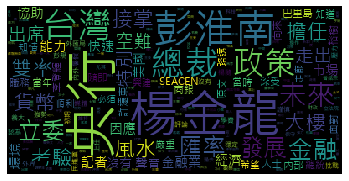

In [38]:
wl_space_split = " ".join(remainder_sentence[0])
my_wordcloud = WordCloud(font_path =r'msfont.ttf').generate(wl_space_split)
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

# 找Y